In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from keras.models import Sequential
from keras.layers import Convolution2D,Input,MaxPooling2D,Dense,Activation,Flatten,Dropout
from keras.utils import np_utils
import tensorflow

In [3]:
ds = pd.read_csv('fashion-mnist_train.csv')
ds = ds.values
ds =np.array(ds)

In [41]:
print(ds.shape)

(60000, 785)


In [42]:
X_ = ds[:,1:]
Y_ = ds[:,0]
print(X_.shape)
print(Y_.shape)

(60000, 784)
(60000,)


In [43]:
x_train = X_.reshape(60000,28,28,1)
y_train = np_utils.to_categorical(Y_)
x_train=np.array(x_train)
y_train=np.array(y_train)

In [44]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


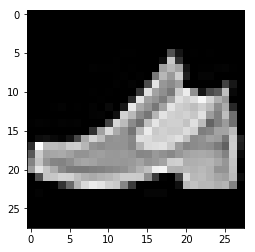

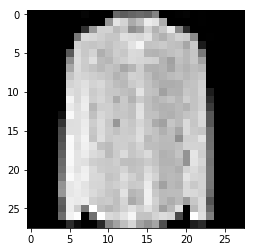

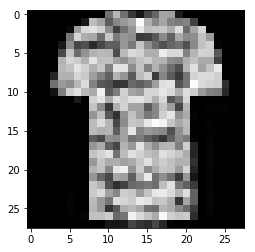

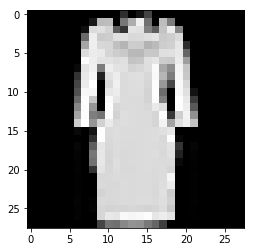

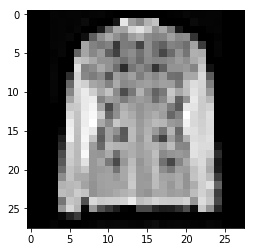

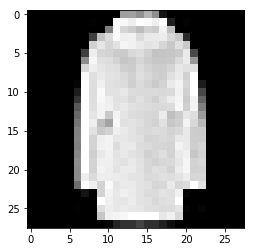

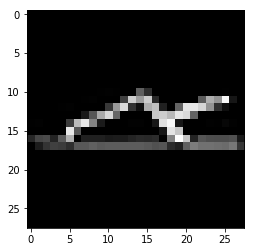

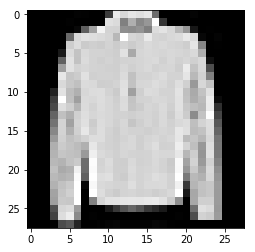

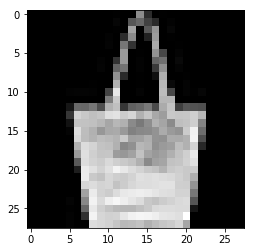

In [45]:
for ix in range(1,10):
    plt.figure(ix)
    plt.imshow(x_train[ix].reshape(28,28), cmap='gray')
#     x_train[ix] = x_train[ix].reshape(28,28,1)
plt.show()


# print(x_train[1].reshape(28,28))

## CNN Model

In [52]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
__________

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
history = model.fit(x_train,y_train
                    ,epochs=10,validation_split=0.2
                    ,shuffle=True,batch_size=256)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 160s 3ms/step - loss: 5.6947 - acc: 0.4787 - val_loss: 0.5784 - val_acc: 0.8005
Epoch 2/10
48000/48000 [==============================] - 162s 3ms/step - loss: 0.4801 - acc: 0.8320 - val_loss: 0.4266 - val_acc: 0.8518
Epoch 3/10
48000/48000 [==============================] - 164s 3ms/step - loss: 0.3831 - acc: 0.8642 - val_loss: 0.3822 - val_acc: 0.8695
Epoch 4/10
48000/48000 [==============================] - 162s 3ms/step - loss: 0.3343 - acc: 0.8801 - val_loss: 0.3640 - val_acc: 0.8716
Epoch 5/10
48000/48000 [==============================] - 165s 3ms/step - loss: 0.3079 - acc: 0.8897 - val_loss: 0.3315 - val_acc: 0.8832
Epoch 6/10
48000/48000 [==============================] - 163s 3ms/step - loss: 0.2808 - acc: 0.9001 - val_loss: 0.3309 - val_acc: 0.8814
Epoch 7/10
48000/48000 [==============================] - 164s 3ms/step - loss: 0.2610 - acc: 0.9048 - val_loss: 0.3023 - 

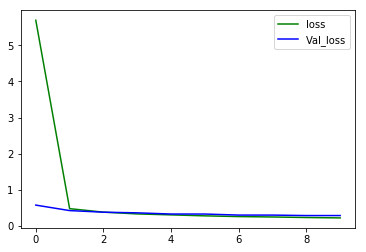

In [55]:
plt.figure(0)
plt.plot(history.history['loss'],'g',label='loss')
plt.plot(history.history['val_loss'],'b',label='Val_loss')
plt.legend()
plt.show()

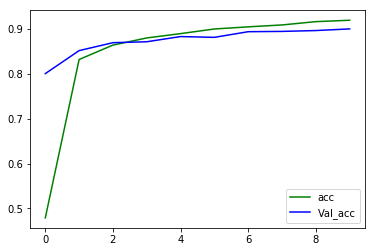

In [56]:
plt.figure(0)
plt.plot(history.history['acc'],'g',label='acc')
plt.plot(history.history['val_acc'],'b',label='Val_acc')
plt.legend()
plt.show()

## Saving the model to save training everytime

In [ ]:
model.save('model_cnn.h5')